In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv")
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
print(df.shape)
print(df['loan_status'].value_counts())
df.describe()


(32581, 12)
loan_status
0    25473
1     7108
Name: count, dtype: int64


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


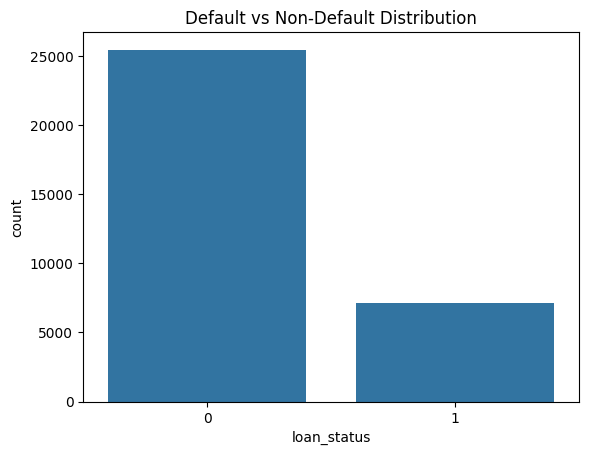

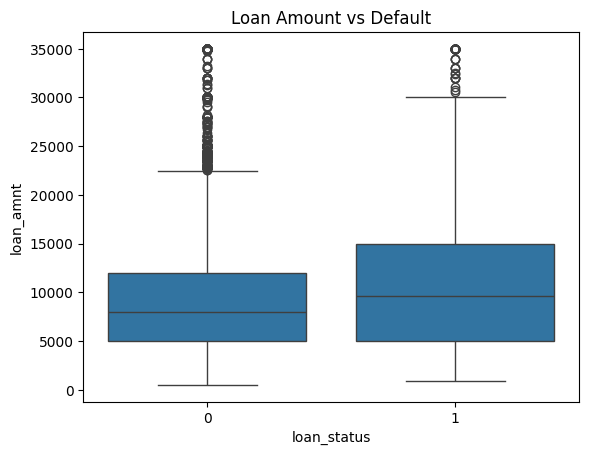

In [4]:
sns.countplot(x='loan_status', data=df)
plt.title("Default vs Non-Default Distribution")
plt.show()

sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title("Loan Amount vs Default")
plt.show()


In [5]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)
df.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True


In [7]:
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
pd_model = LogisticRegression(max_iter=1000)
pd_model.fit(X_train_scaled, y_train)

pd_test = pd_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_score(y_test, pd_test)


np.float64(0.8693475167320214)

In [9]:
results = X_test.copy()
results['PD'] = pd_test
results['EAD'] = df.loc[results.index, 'loan_amnt']

results['LGD'] = np.where(
    df.loc[results.index, 'loan_grade'].isin(['A', 'B']), 0.30,
    np.where(df.loc[results.index, 'loan_grade'].isin(['C', 'D']), 0.45, 0.60)
)

results['ECL'] = results['PD'] * results['LGD'] * results['EAD']
results.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,PD,EAD,LGD,ECL
6616,22,50000,6.0,6000,11.89,0.12,2,False,False,True,...,False,False,False,False,False,False,0.111260,6000,0.30,200.267148
21802,32,52000,0.0,7125,7.49,0.14,10,False,False,True,...,False,False,False,False,False,False,0.087699,7125,0.30,187.456570
31886,37,205000,3.0,18000,10.39,0.09,14,False,False,False,...,False,False,False,False,False,False,0.008978,18000,0.30,48.482137
17799,26,100000,5.0,24000,10.99,0.24,4,False,False,False,...,False,False,False,False,False,False,0.069575,24000,0.30,500.940807
5207,23,44340,0.0,3000,12.98,0.07,3,False,True,False,...,True,False,False,False,False,True,0.006041,3000,0.45,8.155684


Total Exposure at Default (EAD): 63021900
Total Expected Credit Loss (ECL): 6690264.56


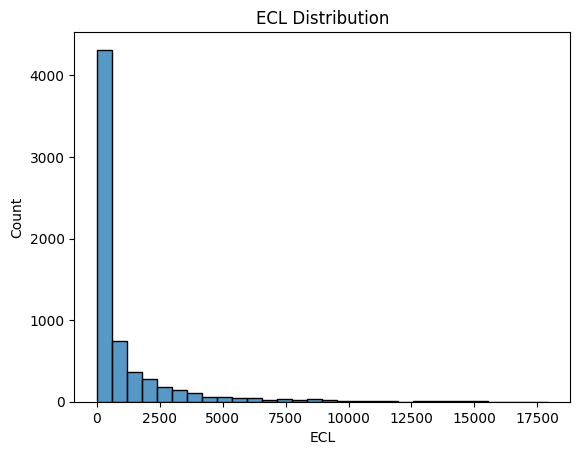

In [10]:
print("Total Exposure at Default (EAD):", round(results['EAD'].sum(), 2))
print("Total Expected Credit Loss (ECL):", round(results['ECL'].sum(), 2))

sns.histplot(results['ECL'], bins=30)
plt.title("ECL Distribution")
plt.show()
